# SeSiMe
### Sentence/Sequence Similarity Measure

### (1) BGC side
Import BGC data and create documents.

In [1]:
path_bgc_data = "C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA\\Data\\Crusemann_dataset\\bgc_crusemann\\"
path_results = "C:\\OneDrive - Netherlands eScience Center\\Project_Wageningen_iOMEGA\\Data\\"

import BGC_functions


In [2]:
filename_include = "*.*"
filename_exclude = "_2."

BGCs, BGCs_dict, BGC_documents = BGC_functions.load_BGC_data(path_bgc_data, 
                                                              filename_include, 
                                                              filename_exclude, 
                                                              path_results, 
                                                              results_file = "BGC_collected_data_02.json", 
                                                              filefilter="*cluster001.gbk",
                                                              entry = "single")

BGC json file found and loaded.


In [13]:
# Have a look at how a document looks like:
print(BGC_documents[1])

['PF13847', 'PF00891', 'PF13489', 'PF01209', 'PF13659', 'PF12847', 'PF08241', 'PF02353', 'PF08242', 'PF06325', 'PF13649', 'PF08704', 'PF05175', 'PF01170', 'PF13679', 'PF00398', 'PF01596', 'PF01135', 'PF02390', 'PF07021', 'PF01728', 'PF12697', 'PF12695', 'PF00561', 'PF01408', 'PF02629', 'PF02615', 'PF01546', 'PF01261', 'PF01408', 'PF00155', 'PF01041', 'PF01212', 'PF01053', 'PF01041', 'PF01212', 'PF01053', 'PF00266', 'PF01135', 'PF08704', 'PF01269', 'PF01209', 'PF13489', 'PF13659', 'PF12847', 'PF13847', 'PF13649', 'PF08242', 'PF08241', 'PF01040', 'PF02737', 'PF03446', 'PF03721', 'PF00984', 'PF03720', 'PF03594', 'PF00860', 'PF13191', 'PF00004', 'PF12806', 'PF00196', 'PF13936', 'PF14493', 'PF12680', 'PF14534', 'PF04545', 'PF08281', 'PF04542', 'PF13193', 'PF00501', 'PF07366', 'PF12680', 'PF14534', 'PF13474', 'PF13577', 'PF08332', 'PF13347', 'PF00083', 'PF07690', 'PF12832', 'PF06609', 'PF00083', 'PF13454']


In [17]:
len(BGC_documents)  # number of BGCs = number of documents

5927

#### Switch to general SeSiMe functionality
Once we have a corpus (e.g. through cells above), we can use SeSiMe to apply different similarity measuring methds. 

In [4]:
from Similarities import SimilarityMeasures

BGC_measure = SimilarityMeasures(BGC_documents)

Using TensorFlow backend.


In [5]:
BGC_measure.preprocess_documents(0.2, create_stopwords = False)

Preprocess documents...


### Word2Vec -based approach
Create Word2Vec based document centroid vectors

In [6]:
file_model_word2vec = 'data\\model_word2vec_bgc_crusemann_window50_d100.model' 
BGC_measure.build_model_word2vec(file_model_word2vec, size=100, window=50, 
                             min_count=1, workers=4, iter=250, 
                             use_stored_model=True)

Load stored word2vec model ...


In [7]:
BGC_measure.get_vectors_centroid(weighted=True)
BGC_measure.get_centroid_distances(num_hits=25, method='cosine')

  Calculated centroid vectors for  5927  of  5927  documents.

This has calculated (cosine) distances between all BGCs in an all-vs-all fashion.
The "num_hits" closest candidates for each BGC are listed in two matrices.

One stores the distances, the other the respective IDs.

In [8]:
BGC_measure.Cdistances_ctr[0,:]

array([0.        , 0.07069802, 0.08078969, 0.08078969, 0.12764609,
       0.1280323 , 0.28691273, 0.29418382, 0.35633404, 0.36912834,
       0.3982458 , 0.39864409, 0.39874282, 0.39968082, 0.39968082,
       0.39968082, 0.40029007, 0.40029007, 0.40029007, 0.40029007,
       0.40117184, 0.40117184, 0.40145857, 0.40157033, 0.40185494])

In [9]:
BGC_measure.Cdistances_ctr_idx[0,:]

array([   0, 1203, 4346, 4238,  326, 4503, 5565, 5392, 5764, 4442, 2406,
       3776, 2629, 1674, 5587, 3882, 2051, 4058, 1614, 3707,  594, 1936,
       3810, 5697, 1314])

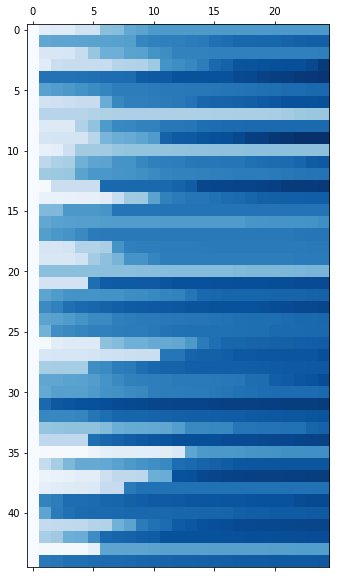

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
ax.matshow(BGC_measure.Cdistances_ctr[:45,:25], cmap=plt.cm.Blues)

### Plot genes to visually compare selected BGCs

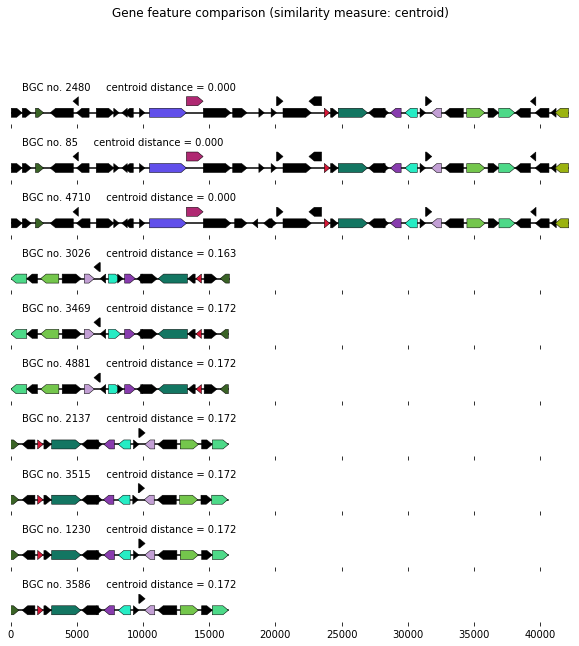

In [16]:
# Plot genes of closest candidates for query BGC id:
# intersting ones: 0, 7, 8, 9, 14, 43 (some very similar ones), 58
# interesting also 65, 76
# see 81 --> Short BGCs more quickly seem to be ranked as close!
BGC_functions.plot_bgc_genes(85, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "centroid")

### Try different similarity measuring methods...

#### A) Autoencoder
Will train a deep autoencoder to generate 100 dimensional (or = encoding_dim) vectors representing each document. 

In [13]:
file_model_ae = 'data\\model_autoencoder_bgc_crusemann.h5'
file_model_encoder = 'data\\model_encoder_bgc_crusemann.h5'
BGC_measure.build_autoencoder(file_model_ae, file_model_encoder, epochs = 20, batch_size = 1024, encoding_dim = 100)

No stored model found!
Creating new autoencoder model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               2177600   
_________________________________________________________________
dense_2 (Dense)              (None, 400)               320400    
_________________________________________________________________
dense_3 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_6 (Dense)              (None, 400)               80400     
_________________________________________________________________
dense_7 (Dense)    

In [14]:
BGC_measure.get_autoencoder_distances(num_hits=25, method='cosine')

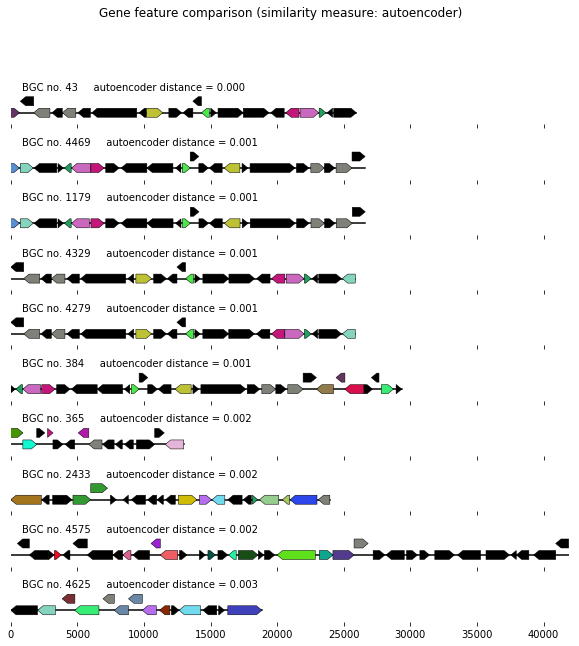

In [15]:
BGC_functions.plot_bgc_genes(43, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "autoencoder")

#### B) PCA
Will calulate 100 dimensional representations of each document using PCA.

In [10]:
BGC_measure.get_vectors_pca(100)

In [11]:
BGC_measure.get_pca_distances(num_hits=25, method='cosine')

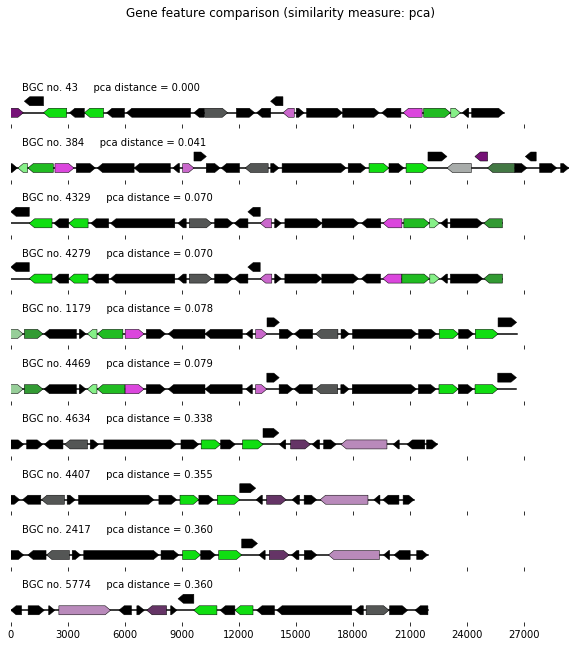

In [12]:
BGC_functions.plot_bgc_genes(43, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "pca")

#### C) Doc2Vec
Will calulate 100 dimensional representations of each document using Doc2Vec.

In [20]:
file_model_doc2vec = "data\\model_doc2vec_bgc_crusemann.model"
BGC_measure.build_model_doc2vec(file_model_doc2vec, vector_size=100, window=50, 
                             min_count=1, workers=4, epochs=250, 
                             use_stored_model=True)

Stored doc2vec model not found!
Calculating new doc2vec model...


In [21]:
BGC_measure.get_doc2vec_distances(num_hits=25, method='cosine')

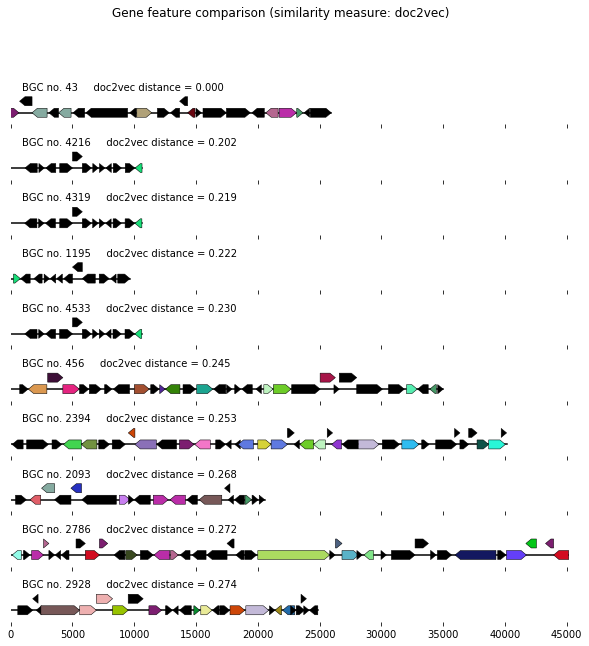

In [22]:
BGC_functions.plot_bgc_genes(43, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "doc2vec")

#### D) LDA
Will calulate document distances using LDA.

In [23]:
file_model_lda = "data\\model_lda_bgc_crusemann.model"
BGC_measure.build_model_lda(file_model_lda, num_of_topics=100, num_pass=4, 
                        num_iter=100, use_stored_model=True)

Stored LDA model not found!
Calculating new LDA model...


C:\Users\FlorianHuber\Anaconda3\lib\site-packages\gensim\models\ldamodel.py:1023: RuntimeWarning: divide by zero encountered in log
  diff = np.log(self.expElogbeta)


'Keyword in the 10 topics'
[(5,
  '0.090*"pf00415" + 0.077*"pf13540" + 0.055*"pf07690" + 0.045*"pf00528" + '
  '0.035*"pf13531" + 0.029*"pf00805" + 0.029*"pf13416" + 0.029*"pf01547" + '
  '0.027*"pf01978" + 0.026*"pf07784"'),
 (80,
  '0.037*"pf12802" + 0.029*"pf01022" + 0.029*"pf12840" + 0.029*"pf13412" + '
  '0.027*"pf01978" + 0.019*"pf03935" + 0.018*"pf00532" + 0.016*"pf11187" + '
  '0.016*"pf13377" + 0.015*"pf01867"'),
 (26,
  '0.073*"pf00415" + 0.056*"pf13540" + 0.049*"pf01266" + 0.038*"pf13738" + '
  '0.030*"pf07992" + 0.028*"pf13454" + 0.027*"pf13450" + 0.027*"pf00111" + '
  '0.026*"pf12831" + 0.025*"pf03486"'),
 (24,
  '0.038*"pf01266" + 0.027*"pf02737" + 0.023*"pf02518" + 0.023*"pf00072" + '
  '0.018*"pf00378" + 0.018*"pf12681" + 0.018*"pf00083" + 0.018*"pf01494" + '
  '0.017*"pf07690" + 0.016*"pf00070"'),
 (72,
  '0.072*"pf00415" + 0.061*"pf13540" + 0.034*"pf00501" + 0.032*"pf07690" + '
  '0.031*"pf00550" + 0.029*"pf13193" + 0.028*"pf00668" + 0.028*"pf13745" + '
  '0.016*"pf14

In [24]:
BGC_measure.get_lda_distances(num_hits=25)

C:\Users\FlorianHuber\Anaconda3\lib\site-packages\gensim\matutils.py:718: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


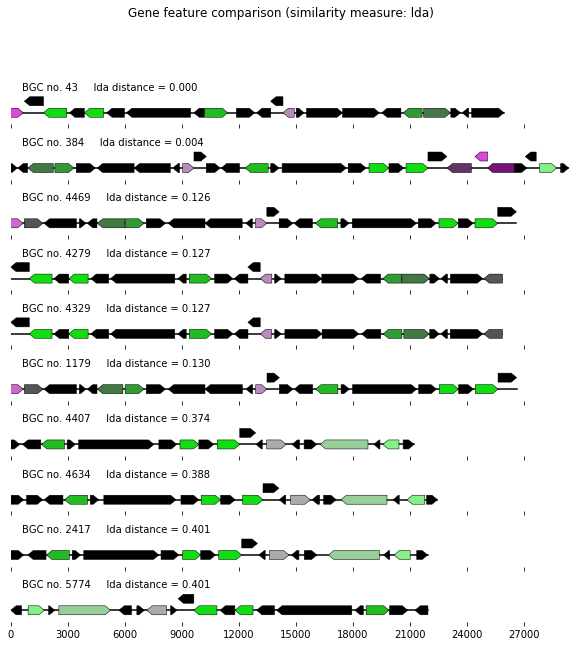

In [25]:
BGC_functions.plot_bgc_genes(43, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "lda")

#### E) LSI
Will calulate document distances using LSI.

In [26]:
file_model_lsi = "data\\model_lsi_bgc_crusemann.model"
BGC_measure.build_model_lsi(file_model_lsi, num_of_topics=100, 
                             use_stored_model=True)

Stored LSI model not found!
Calculating new LSI model...


In [27]:
BGC_measure.get_lsi_distances(num_hits=25)

C:\Users\FlorianHuber\Anaconda3\lib\site-packages\gensim\matutils.py:718: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


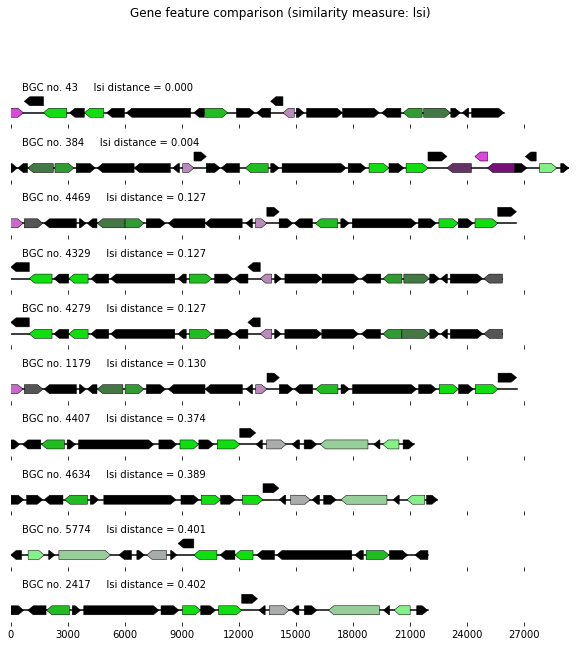

In [28]:
BGC_functions.plot_bgc_genes(43, BGCs_dict, BGC_measure, num_candidates = 10, 
                   sharex=True, labels=False, dist_method = "lsi")

### (2) Mass spec side
Import MS data and create documents.

See other notebook: LINK